In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Class and functions definitions 

## Class to implement multivariate linear regression using gradient descent

### y = θ_0 + θ_1 * x1 + θ_2 * x2 + ... + θ_n * xn

In [2]:
# Class to perform linear regression with gradient descent algorithm - Model 1
class LinearRegressionCustomModel1:
    def __init__(self, learning_rate, iterations_nb):
        self.learning_rate = learning_rate  # Learning rate
        self.iterations_nb = iterations_nb  # Number of iterations
        self.theta = None

    # Method to fit the model to the training data
    def fit(self, x_train, y_train):
        # Add column of ones to x_train - Bias / Intercept
        x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))

        # Number of training samples and number of features
        n, r = x_train.shape

        # Initialise theta with a vector of zeros
        self.theta = np.zeros(r)

        # Gradient descent algorithm
        for _ in range(self.iterations_nb):
            # Compute predictions (y_pred = x_train * theta)
            y_pred = x_train.dot(self.theta)

            # Compute error (difference between predictions and actual values)
            error = y_pred - y_train

            # Compute gradient
            gradient = (2 / n) * error.dot(x_train)

            # Update parameters
            self.theta -= self.learning_rate * gradient

            # Compute cost (mean squared error)
            cost = (1 / n) * np.sum((y_pred - y_train) ** 2)

        return self.theta, cost

    # Method to predict the output for a given input
    def predict(self, x_test):
        # Add column of ones to x_test - Bias / Intercept
        x_test = np.column_stack((np.ones(x_test.shape[0]), x_test))

        # Return predictions with interaction term
        y_pred = x_test.dot(self.theta)  # Compute predictions
        assert (
            y_pred.shape[0] == x_test.shape[0]
        ), "Mismatch in prediction shape"  # Check if the shape of the prediction is correct

        return y_pred

    # Method to compute the metrics of the model
    def metrics(self, x_test, y_test):
        # Compute predictions
        y_pred = self.predict(x_test)

        # Compute metrics
        rSquare = metrics.r2_score(y_test, y_pred)  # R squared
        meanAbErr = metrics.mean_absolute_error(y_test, y_pred)  # Mean absolute error
        meanSqErr = metrics.mean_squared_error(y_test, y_pred)  # Mean squared error
        rootMeanSqErr = np.sqrt(
            metrics.mean_squared_error(y_test, y_pred)
        )  # Root mean squared error

        return rSquare, meanAbErr, meanSqErr, rootMeanSqErr

### y = θ_0 + θ_1 * x1 + θ_2 * x2 + θ_3 * (x1 * x2)

In [3]:
# Class to perform linear regression with gradient descent algorithm - Model 2
class LinearRegressionCustomModel2:
    def __init__(self, learning_rate, iterations_nb):
        self.learning_rate = learning_rate  # Learning rate
        self.iterations_nb = iterations_nb  # Number of iterations
        self.theta = None

    # Method to fit the model to the training data
    def fit(self, x_train, y_train):
        # Convert DataFrame to numpy array
        x_train = x_train.values

        # Add column of ones to x_train - Bias / Intercept
        interaction_term = (
            x_train[:, 0] * x_train[:, 1]
        )  # Interaction term between x1 and x2
        x_train = np.column_stack(
            (np.ones(x_train.shape[0]), x_train, interaction_term)
        )

        # Number of training samples and number of features
        n, r = x_train.shape

        # Initialise theta with a vector of zeros
        self.theta = np.zeros(r)

        # Gradient descent algorithm
        for _ in range(self.iterations_nb):
            # Compute predictions
            y_pred = x_train.dot(self.theta)

            # Compute error (difference between predictions and actual values)
            error = y_pred - y_train

            # Compute gradient
            gradient = (2 / n) * error.dot(x_train)

            # Update parameters
            self.theta -= self.learning_rate * gradient

            # Compute cost (mean squared error)
            cost = (1 / n) * np.sum((y_pred - y_train) ** 2)

        return self.theta, cost

    # Method to predict the output for a given input
    def predict(self, x_test):
        # Add column of ones to x_test - Bias / Intercept
        x_test = np.column_stack((np.ones(x_test.shape[0]), x_test))

        # Return predictions with interaction term
        y_pred = (
            self.theta[0]
            + self.theta[1] * x_test[:, 1]
            + self.theta[2] * x_test[:, 2]
            + self.theta[3] * (x_test[:, 1] * x_test[:, 2])
        )
        assert (
            y_pred.shape[0] == x_test.shape[0]
        ), "Mismatch in prediction shape"  # Check if the shape of the prediction is correct

        return y_pred

    # Method to compute the metrics of the model
    def metrics(self, x_test, y_test):
        # Compute predictions
        y_pred = self.predict(x_test)

        # Compute metrics
        rSquare = metrics.r2_score(y_test, y_pred)  # R squared
        meanAbErr = metrics.mean_absolute_error(y_test, y_pred)  # Mean absolute error
        meanSqErr = metrics.mean_squared_error(y_test, y_pred)  # Mean squared error
        rootMeanSqErr = np.sqrt(
            metrics.mean_squared_error(y_test, y_pred)
        )  # Root mean squared error

        return rSquare, meanAbErr, meanSqErr, rootMeanSqErr

## Function to compute the optimal train size

In [4]:
# Function to compute the optimal train size
def computeOptimalTrainSize(r):
    # Compute optimal train size
    optimalTestSize = 1 / (np.sqrt(r) + 1)
    optimalTrainSize = 1 - optimalTestSize

    return optimalTrainSize

## Function to compute the optimal parameters for the model 

In [5]:
# Function to compute the optimal parameters depending on the model type
def computeOptimalParameters(x_train, x_test, y_train, y_test, model_type):
    # Set hyperparameters
    iterations_numbers = [
        200,
        300,
        400,
        500,
        1000,
        2000,
        3000,
        5000,
        7000,
        10000,
    ]  # Number of iterations
    learning_rates = [0.1, 0.01, 0.05, 0.001, 0.005]  # Learning rate

    # Initialise an empty array to store the results
    results = []

    # Set seed for reproducibility
    np.random.seed(0)

    # Computes linear regression for each hyperparameters
    for iterations_nb in iterations_numbers:
        for learning_rate in learning_rates:
            # Initialise model
            if model_type == 2:
                # Model 2
                model = LinearRegressionCustomModel2(learning_rate, iterations_nb)
            else:
                # Model 1
                model = LinearRegressionCustomModel1(learning_rate, iterations_nb)
            # Fit model to training data
            theta, cost = model.fit(x_train, y_train)
            # Compute metrics
            rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model.metrics(
                x_test, y_test
            )
            # Save results
            results.append(
                {
                    "iterations_nb": iterations_nb,
                    "learning_rate": learning_rate,
                    "cost": cost,
                    "rSquare": rSquare,
                    "meanAbErr": meanAbErr,
                    "meanSqErr": meanSqErr,
                    "rootMeanSqErr": rootMeanSqErr,
                }
            )

    # Convert results to dataframe
    results = pd.DataFrame(results)

    # Sort results by MSE
    results = results.sort_values("meanSqErr", ascending=True)

    # Return best hyperparameters
    return (
        int(results.iloc[0]["iterations_nb"]),
        results.iloc[0]["learning_rate"],
        results,
    )

## Function to split data into training and test sets, and to standardise the data 

In [6]:
# Function to prepare data (split data into train and test sets, and standardise data)
def prepare_data(x, y, train_size):
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)

    # standardise data
    x_train = (x_train - x_train.mean()) / x_train.std()  # standardise train set
    x_test = (x_test - x_test.mean()) / x_test.std()  # standardise test set

    #  Return train and test sets
    return x_train, x_test, y_train, y_test

# Analysis of the "Advertising.csv" dataset 

## Load the data

In [7]:
# Load data from csv file
advertising_df = pd.read_csv("Advertising.csv", index_col=0)
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##  Display shape and summary of the dataset

In [8]:
# Shape of the data
advertising_df.shape

(200, 4)

In [9]:
# Statistical description of the data
advertising_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Pairplot of the dataset to visualize the relationship between the features and the sales

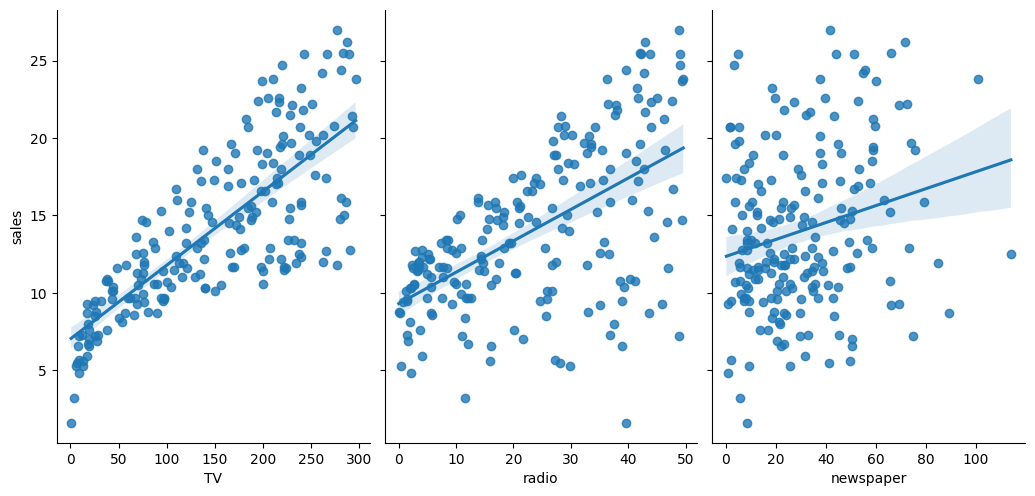

In [10]:
# Plot raw data
sns.pairplot(
    advertising_df,
    x_vars=["TV", "radio", "newspaper"],
    y_vars="sales",
    height=5,
    aspect=0.7,
    kind="reg",
)

## Compute the correlation matrix

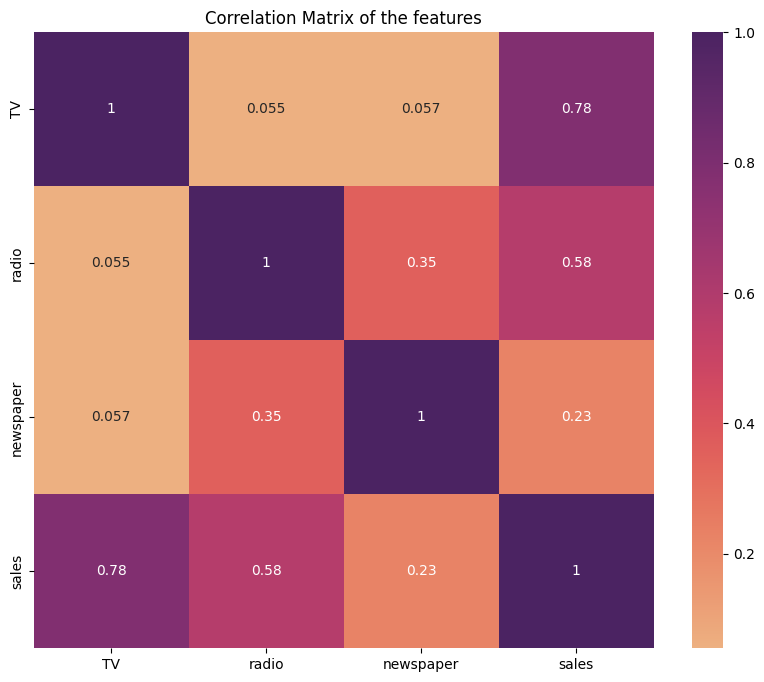

In [11]:
# Compute correlation matrix and plot it
correlation_matrix = advertising_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="flare", annot=True)
plt.title("Correlation Matrix of the features")
plt.show()

# Test of the multivariate linear regression class on the "Advertising.csv" dataset

## Test of the custom class with two predictors: TV and radio to predict sales

### Find the optimal hyperparameters for the multivariate linear regression class

In [12]:
# Optimal Ratio of Training and Test Data 
r = 3 # Amount of features
optimalTrainSize = computeOptimalTrainSize(r)
print("Optimal train size:", optimalTrainSize)

Optimal train size: 0.6339745962155614


### Prepare the data

In [13]:
# Prepare data
x = advertising_df[['TV', 'radio']] # Load features
y = advertising_df['sales'] # Load target
x_train, x_test, y_train, y_test = prepare_data(x, y, optimalTrainSize)
x_train.head()

,TV,radio
143,0.931925,0.617135
39,-1.141117,0.181266
173,-1.415731,-0.261309
58,-0.053179,-0.321660
107,-1.352628,-0.871525


### Compute the optimal parameters for the models

In [14]:
# Compute optimal hyperparameters for model 1
(
    iterations_nb_model_1,
    learning_rate_model_1,
    results_model_1,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, 1)

# Compute optimal hyperparameters for model 2
(
    iterations_nb_model_2,
    learning_rate_model_2,
    results_model_2,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, 2)

# Print results
print("Optimal hyperparameters for model 1:")
print("Iterations number:", iterations_nb_model_1)
print("Learning rate:", learning_rate_model_1)
print("")
print("Optimal hyperparameters for model 2:")
print("Iterations number:", iterations_nb_model_2)
print("Learning rate:", learning_rate_model_2)

Optimal hyperparameters for model 1:
Iterations number: 3000
Learning rate: 0.005

Optimal hyperparameters for model 2:
Iterations number: 200
Learning rate: 0.1


### Compute the Linear Regression model with the optimal parameters

In [15]:
print("Computing Linear Regression with optimal hyperparameters for model 1...\n")

# Initialise model
model = LinearRegressionCustomModel1(learning_rate_model_1, iterations_nb_model_1)

# Fit model to training data
theta, cost = model.fit(x_train, y_train)
print("Linear Regression Coefficients:", theta)
print("Cost:", cost)
print("")

# Compute predictions
y_pred_1 = model.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters for model 1...

Linear Regression Coefficients: [13.91269841  4.15744806  2.75793301]
Cost: 2.7556009056485316

Metrics:
R squared: 0.8722598377311334
Mean absolute error: 1.3950757377993106
Mean squared error: 3.04622893388143
Root mean squared error: 1.745344932636936


### Compute the second Linear Regression model with the optimal parameters

In [16]:
print("Computing Linear Regression with optimal hyperparameters for model 2...\n")

# Initialise model
model_2 = LinearRegressionCustomModel2(learning_rate_model_2, iterations_nb_model_2)

# Fit model
theta, cost = model_2.fit(x_train, y_train)
print("Linear Regression Coefficients:", theta)
print("Cost:", cost)
print("")

# Compute predictions
y_pred_1_model_2 = model_2.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model_2.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters for model 2...

Linear Regression Coefficients: [13.82041307  3.9292264   2.65986477  1.40466386]
Cost: 0.9343105040113241

Metrics:
R squared: 0.9545997806084782
Mean absolute error: 0.8290943231664821
Mean squared error: 1.0826623315533828
Root mean squared error: 1.0405106109758722


### Plot the predicted values against the actual values

Text(0.5, 0.92, '3D Scatter plot of Sales depending on TV and Radio budgets - Model 1')

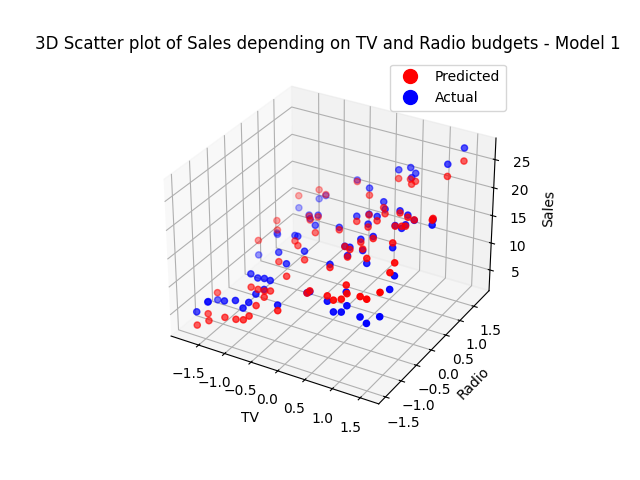

In [17]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1, c='r')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Add a legend of colors
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label='Predicted')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[red_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Model 1')

Text(0.5, 0.92, '3D Scatter plot of Sales depending on TV and Radio budgets - Model 2')

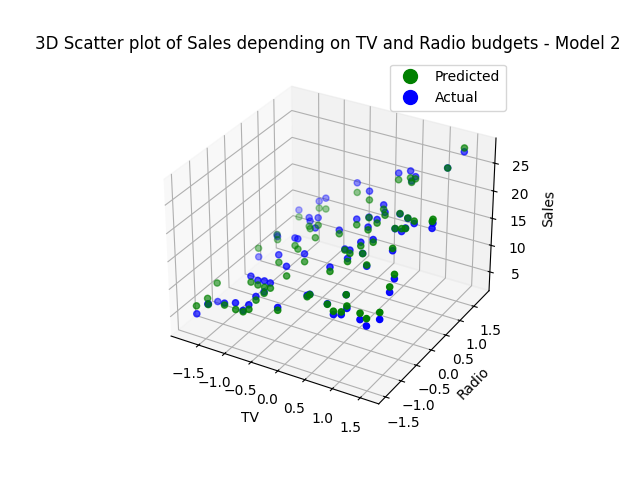

In [18]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1_model_2, c='g')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Add a legend of colors
green_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='green', label='Predicted')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[green_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Model 2')

Text(0.5, 0.92, '3D Scatter plot of Sales depending on TV and Radio budgets - Model 1 and 2')

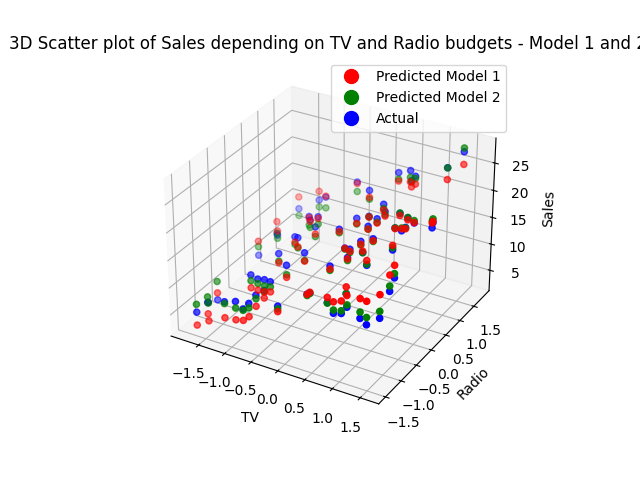

In [19]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1, c='r')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_1_model_2, c='g')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Add a legend of colors
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label='Predicted Model 1')
green_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='green', label='Predicted Model 2')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[red_patch[0], green_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Model 1 and 2')

### Verification using the sklearn library

In [20]:
print("Computing Linear Regression with Scikit-Learn...\n")
# Training the model
model = LinearRegression()
model.fit(x_train, y_train)

# Testing the model
y_pred_verif_1 = model.predict(x_test)

# Evaluating the model
print('R squared:', metrics.r2_score(y_test, y_pred_verif_1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_1)))


Computing Linear Regression with Scikit-Learn...

R squared: 0.8722598377311301
Mean Absolute Error: 1.3950757377991312
Mean Square Error: 3.0462289338815083
Root Mean Square Error: 1.7453449326369583


Text(0.5, 0, 'Sales')

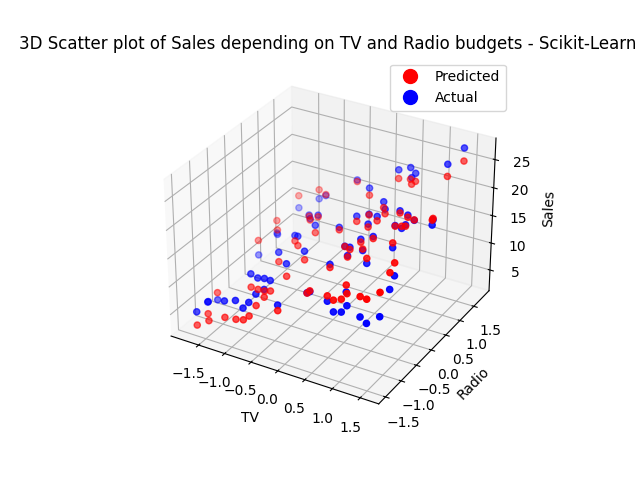

In [21]:
# Initialise matplotlib
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Get values using DataFrame's .iloc
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_test.values, c='b')
ax.scatter(x_test.iloc[:, 0].values, x_test.iloc[:, 1].values, y_pred_verif_1, c='r')

# Add a legend of colors
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='red', label='Predicted')
blue_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='blue', label='Actual')
plt.legend(handles=[red_patch[0], blue_patch[0]])

# Set title
ax.set_title('3D Scatter plot of Sales depending on TV and Radio budgets - Scikit-Learn')

# Set labels for axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## Test of the custom class with 3 predictors: TV, radio and newspaper to predict sales

### Find the optimal hyperparameters for the multivariate linear regression class

In [22]:
# Optimal Ratio of Training and Test Data 
r = 4 # Amount of features
optimalTrainSize = computeOptimalTrainSize(r)
print("Optimal train size:", optimalTrainSize)

Optimal train size: 0.6666666666666667


### Prepare the data 

In [23]:
# Prepare data
x = advertising_df[['TV', 'radio', 'newspaper']]
y = advertising_df['sales']
x_train, x_test, y_train, y_test = prepare_data(x, y, optimalTrainSize)

### Compute the optimal parameters for the model

In [24]:
# Compute optimal hyperparameters
iterations_nb, learning_rate, results = computeOptimalParameters(x_train, x_test, y_train, y_test, 1)

print("Optimal hyperparameters:")
print("Iterations number:", iterations_nb)
print("Learning rate:", learning_rate)

Optimal hyperparameters:
Iterations number: 300
Learning rate: 0.005


### Compute the Linear Regression model with the optimal parameters

In [25]:
print("Computing Linear Regression with optimal hyperparameters...\n")

# Initialise model
model = LinearRegressionCustomModel1(learning_rate, iterations_nb)

# Fit model
model.fit(x_train, y_train)

# Compute predictions
y_pred_2 = model.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters...

Metrics:
R squared: 0.8505503161618932
Mean absolute error: 1.2841709009521454
Mean squared error: 3.925976276658181
Root mean squared error: 1.981407650297682


### Verification using the sklearn library

In [26]:
print("Computing Linear Regression with Scikit-Learn...\n")

# Training the model
model = LinearRegression()

# Fitting the model to the training data
model.fit(x_train, y_train)

# Computing predictions
y_pred_verif_2 = model.predict(x_test)

# Evaluating the model
print("Metrics:")
print('R squared:', metrics.r2_score(y_test, y_pred_verif_2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_2))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_2)))

Computing Linear Regression with Scikit-Learn...

Metrics:
R squared: 0.8332052784146583
Mean Absolute Error: 1.3061018659921688
Mean Square Error: 4.381622651843232
Root Mean Square Error: 2.093232584268464
